<a href="https://colab.research.google.com/github/gabrielaagu/Data-Science/blob/main/03_Captura_de_informaci%C3%B3n_de_una_web_(Web_Scraping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3 - Captura de información de una web (Web Scraping) (1,25 puntos)

En este ejercicio vamos a extraer información de la web http://quotes.toscrape.com/ utilizando dos librerías de Python: requests y BeautifulSoup



### Explicación previa

Requests es una librería muy famosa en Python para hacer peticiones HTTP.

In [3]:
import requests
import bs4

res = requests.get('http://quotes.toscrape.com/')
print(res.status_code)
#Un status code igual a 200 significa que la petición fue correcta
#https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

print(res.text[0:300])


200
<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
          


Para extraer información del HTML usaremos la librería Beautiful Soup.
BeautifulSoup nos permite parsear el HTML y ofrece métodos para seleccionar tags y elementos del HTML.

In [4]:
#Mostrar el texto del primer tag h1
soup = bs4.BeautifulSoup(res.text)
h1_tag = soup.select('h1')
if(h1_tag):
  print(h1_tag[0].text)


Quotes to Scrape



Antes de iniciar el proceso de Web Scraping es interesante inspeccionar el código HTML de http://quotes.toscrape.com/.
Para ello vamos a la web desde un navegador y hacemos clic derecho en cualquier lugar y seleccionamos la opción
'Inspeccionar'. Podemos expandir y contraer varios nodos y encontrar el código fuente para una parte específica de la página.



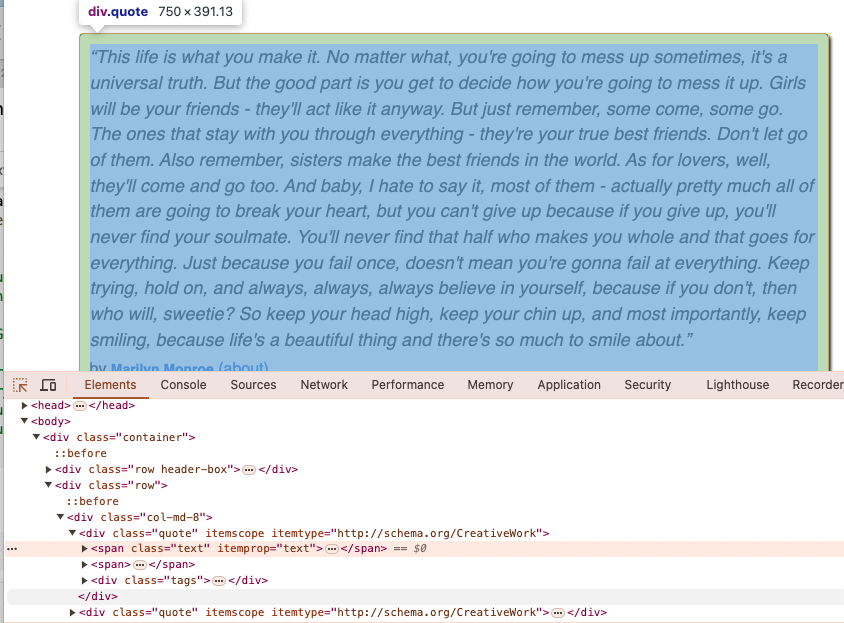

## 3.1 Obtener los tags que contengan las citas de las 10 primeras páginas. Mostrar por terminal el texto de la cita (0,5 ptos)
Sólo se debe mostrar el texto de la cita, no hay que mostrar el autor ni otra información adicional. Podemos apoyarnos de la documentación oficial de [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) y la información sobre los CSS Selectors contenida en [W3Schools](https://www.w3schools.com/cssref/css_selectors.php).

Fíjate que la URL cambia cuando avanzamos de página!

In [5]:
import requests
from bs4 import BeautifulSoup

base_url = "http://quotes.toscrape.com/page/{}/"

for i in range(1, 11):  # Para las páginas 1 a 10
    url = base_url.format(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    quotes = soup.find_all('div', class_='quote')

    print(f"Página {i}:")
    for quote in quotes:
        tags = quote.find_all('a', class_='tag')
        quote_text = quote.find('span', class_='text').text
        print(f"Cita: {quote_text}")
        print("Tags:", ', '.join([tag.text for tag in tags]))
        print()  # Espacio entre citas


Página 1:
Cita: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Tags: change, deep-thoughts, thinking, world

Cita: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Tags: abilities, choices

Cita: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Tags: inspirational, life, live, miracle, miracles

Cita: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Tags: aliteracy, books, classic, humor

Cita: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Tags: be-yourself, inspirational

Cita: “Try not to become a man of success. Rather become a man of value.”
Tags: adulthood, success, value

Cita: “It is better to be hated for what you are than to be loved for what you are not.”
Tags: life, lov

## 3.2 Se pide extraer los nombres de personas **mencionadas** en las citas (obtenidas en el apartado anterior) usando la librería Spacy! (0,75 ptos)

La librería [spaCy](https://spacy.io/usage/spacy-101) es una librería de código abierto para hacer tareas de Procesamiento de Lenguaje Natural (nlp).
spaCy incluye modelos pre-entrenados para [reconocer entidades nombradas](https://spacy.io/usage/spacy-101#annotations-ner) en los textos (como lugares, nombre de compañías, fechas, etc).




In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Podemos obtener más información sobre el modelo
# https://spacy.io/models/en

In [7]:
import requests
from bs4 import BeautifulSoup
import spacy

# Cargar el modelo de lenguaje de SpaCy
nlp = spacy.load("en_core_web_sm")

base_url = "http://quotes.toscrape.com/page/{}/"

for i in range(1, 11):  # Para las páginas 1 a 10
    url = base_url.format(i)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    quotes = soup.find_all('div', class_='quote')

    print(f"Página {i}:")
    for quote in quotes:
        # Extraer el texto de la cita
        quote_text = quote.find('span', class_='text').text
        print(f"Cita: {quote_text}")

        # Extraer los tags asociados con la cita
        tags = quote.find_all('a', class_='tag')
        print("Tags:", ', '.join([tag.text for tag in tags]))

        # Analizar el texto de la cita para encontrar entidades nombradas
        doc = nlp(quote_text)
        print("Entidades mencionadas:")
        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                print(f" - {ent.text}")
        print()  # Espacio entre citas

Página 1:
Cita: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Tags: change, deep-thoughts, thinking, world
Entidades mencionadas:

Cita: “It is our choices, Harry, that show what we truly are, far more than our abilities.”
Tags: abilities, choices
Entidades mencionadas:
 - Harry

Cita: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Tags: inspirational, life, live, miracle, miracles
Entidades mencionadas:

Cita: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Tags: aliteracy, books, classic, humor
Entidades mencionadas:

Cita: “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Tags: be-yourself, inspirational
Entidades mencionadas:

Cita: “Try not to become a man of success. Rather become a man of value.”
Tags: adultho

# Ejercicio 4 - Captura de información del [repositorio de la UOC](https://openaccess.uoc.edu) y de PDFs (2,25 puntos)

### Explicación previa

El repositorio de la UOC cuenta con un buscador que nos permite filtrar documentos.

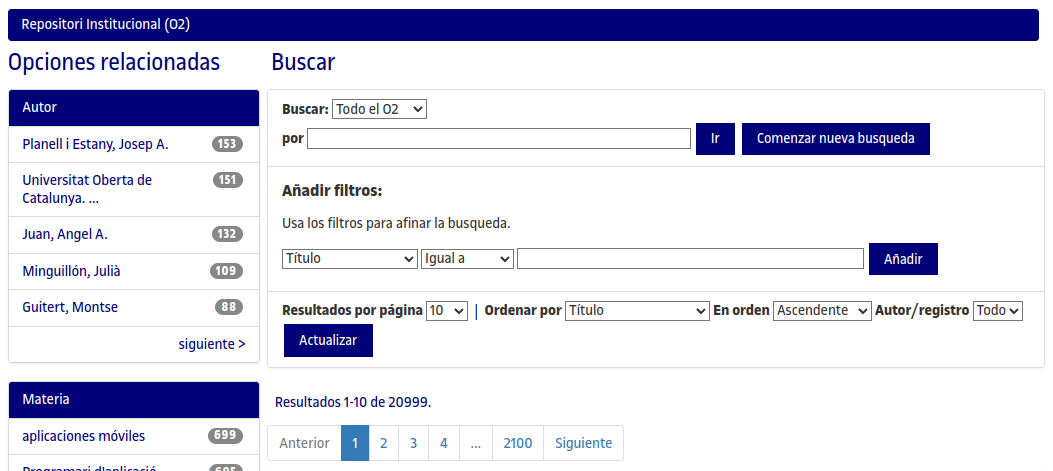

## 4.1 Implementar código Python para descargar publicaciones (pdfs) del repositorio de la UOC cuyo título contenga la palabra Chatgpt y el autor no sea la Universitat Oberta de Catalunya (deben ser TFMs de alumnos). (1pto)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import requests
from bs4 import BeautifulSoup
import os

# Configuramos la URL base para las descargas de los PDFs
base_url = 'https://openaccess.uoc.edu'

# URL de la búsqueda específica
search_url = 'https://openaccess.uoc.edu/simple-search?location=&query=TFM&filter_field_1=title&filter_type_1=contains&filter_value_1=Chatgpt&filter_field_2=author&filter_type_2=notcontains&filter_value_2=Universitat+Oberta+de+Catalunya&rpp=10&sort_by=dc.title_sort&order=ASC&etal=0&submit_search=Actualizar'

response = requests.get(search_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encontramos todos los elementos tr que contienen los datos de las publicaciones
rows = soup.find_all('tr')

# Directorio para guardar los archivos descargados
download_dir = '/content/drive/MyDrive/Downloads/'

for row in rows[1:]:  # Se omite el primer tr que es el encabezado
    cols = row.find_all('td')
    if not cols:
        continue
    link = cols[1].find('a')['href']
    title = cols[1].text.strip()
    author = cols[2].text.strip()

    # Verificamos que el título contenga "ChatGPT" y el autor no sea UOC
    if 'ChatGPT' in title and 'Universitat Oberta de Catalunya' not in author:
        # Construimos la URL para la página del artículo
        article_url = base_url + link
        article_response = requests.get(article_url)
        article_soup = BeautifulSoup(article_response.text, 'html.parser')

        # Encontramos el link de descarga del PDF
        pdf_link = article_soup.find('a', class_='statisticsLink btn btn-info btn-info-center150p')['href']
        pdf_url = base_url + pdf_link

        # Descargamos del PDF
        pdf_response = requests.get(pdf_url)
        pdf_path = os.path.join(download_dir, title.replace('/', '-') + '.pdf')  # Asegurarse que el título no contenga '/'

        with open(pdf_path, 'wb') as f:
            f.write(pdf_response.content)

        print(f"Descargado: {title}")

print("Descargas completadas.")

Descargado: ChatGPT: Una herramienta de Inteligencia Artificial en el aula de secundaria. Análisis de los usos y retos de ChatGPT en la enseñanza de secundaria
Descargado: IA en educación: ¿Es ChatGPT el virus o la panacea de la educación superior?
Descargas completadas.



## 4.2 Implementar código Python para extraer todas las urls que aparecen en el contenido de los pdfs (descargados en el apartado anterior). Las urls detectadas en cada pdf se deben almacenar en un csv. (1 pto)

Una posible librería de Python para procesar PDFs es PyPDF2 cuya documentación oficial se puede encontrar en el siguiente [enlace](https://pypdf2.readthedocs.io/en/3.x/).

In [10]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00


In [11]:
import os
import re
import PyPDF2
import pandas as pd

# Directorio donde se encuentran los PDFs
download_dir = '/content/drive/MyDrive/Downloads'

# Patrón de regex para encontrar URLs
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

# Lista para almacenar los datos
data = []

# Iteramos sobre cada archivo en el directorio
for filename in os.listdir(download_dir):
    if filename.endswith('.pdf'):
        file_path = os.path.join(download_dir, filename)
        try:
            # Abrimos el PDF usando PdfReader
            with open(file_path, 'rb') as pdf_file:
                pdf_reader = PyPDF2.PdfReader(pdf_file)

                # Leemos cada página del PDF
                text = ''
                for page in pdf_reader.pages:
                    text += page.extract_text() if page.extract_text() else ''

                # Encontramos todas las URLs en el texto
                urls = url_pattern.findall(text)
                for url in urls:
                    data.append({'Filename': filename, 'URL': url})

        except Exception as e:
            print(f'Error processing {filename}: {e}')

# Creamos un DataFrame y guardar en CSV
df = pd.DataFrame(data)
csv_path = os.path.join(download_dir, 'extracted_urls.csv')
df.to_csv(csv_path, index=False)
print(f'URLs extracted and saved to {csv_path}')


URLs extracted and saved to /content/drive/MyDrive/Downloads/extracted_urls.csv


## 4.3 Implementar código Python para extraer los metadatos de los pdfs descargados. Los metadatos de cada pdf se deben almacenar en un json. (0,25 ptos)

In [12]:
import os
import PyPDF2
import json

# Lista para almacenar los metadatos de todos los PDFs
all_metadata = []

# Iteramos sobre cada archivo en el directorio
for filename in os.listdir(download_dir):
    if filename.endswith('.pdf'):
        file_path = os.path.join(download_dir, filename)
        try:
            # Abrimos el PDF usando PdfReader
            with open(file_path, 'rb') as pdf_file:
                pdf_reader = PyPDF2.PdfReader(pdf_file)

                # Extraemos los metadatos del PDF
                metadata = pdf_reader.metadata
                # Creamos un diccionario para este PDF
                pdf_metadata = {'Filename': filename, 'Metadata': {key: metadata[key] for key in metadata if metadata[key]}}
                all_metadata.append(pdf_metadata)

        except Exception as e:
            print(f'Error processing {filename}: {e}')

# Guardanis los metadatos en un archivo JSON
json_path = os.path.join(download_dir, 'pdf_metadata.json')
with open(json_path, 'w') as json_file:
    json.dump(all_metadata, json_file, indent=4)

print(f'Metadata extracted and saved to {json_path}')

Metadata extracted and saved to /content/drive/MyDrive/Downloads/pdf_metadata.json



# Ejercicio 5 : RDF y RDFS (2 ptos)

En este notebook vamos a utilizar algunas librerías python útiles para trabajar con tripletas:

*   `rdflib` para trabajar con tripletas RDF
*   `rdflib-jsonld` para usar JSON-LD
*   `SPARQLWrapper` para ejecutar consultas SPARQL e importar los resultados en el notebook
*   `pydotplus` y `graphviz` para visualizar los grafos.

Efectuamos la instalación de las librerías:

In [13]:
! pip install rdflib
! pip install rdflib-jsonld
! pip install -q sparqlwrapper
! pip install pydotplus
! pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.7 MB/s eta 0:00:00


Efectuamos la importación de aquellas librerías y funciones requeridas que utilizaremos.

In [14]:
import io
from rdflib import Graph as RDFGraph
from rdflib import Namespace, URIRef, Literal, BNode
from rdflib.namespace import NamespaceManager
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph,rdflib_to_networkx_multidigraph
import rdflib_jsonld
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, RDF , POST, GET, POSTDIRECTLY, CSV

import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import pprint
import statistics
import collections
import warnings

import networkx as nx
warnings.filterwarnings ("ignore")

/usr/local/lib/python3.10/dist-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(



Las funciones de la librería `rdflib` permiten convertir los datos en un grafo `RDFGraph` con el que cargar los datos. Analicemos el ejemplo inferior.



In [15]:
rdf = '''\
<http://burningbird.net/articles/monsters3.htm> <http://burningbird.net/postcon/elements/1.0/author> "Shelley Powers" .
<http://burningbird.net/articles/monsters3.htm> <http://burningbird.net/postcon/elements/1.0/title> "Architeuthis Dux" .
'''

En este caso vamos a ver el número de tripletas de las que disponemos e imprimirlas.

In [16]:
g = RDFGraph()  # Instanciamos la clase RDFGraph
g.parse( data=rdf, format ="n3") # Cargamos los datos en formato N3 con el método parse. Si no se especifica el formato el método trata de parsear con Turtle.

print(f'El número de tripletas es: {len(g)}') #Vemos la longitud, es decir, el número de tripletas

for tripleta in g:
    pprint.pprint(tripleta)   #Imprimimos las tripletas



El número de tripletas es: 2
(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'),
 rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/title'),
 rdflib.term.Literal('Architeuthis Dux'))
(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'),
 rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/author'),
 rdflib.term.Literal('Shelley Powers'))


Es posible extraer los datos usando las [funciones incluidas](https://rdflib.readthedocs.io/en/stable/) en el paquete `rdflib`:




In [17]:
for h, r, t in g.triples((None,None,None)):
  print( " %s  -- %s --> %s  "  % (h, r ,t) )

print  ()
print ("Sujetos")
print ("----------")
for p in g.subjects():
  print (p)

print ("Predicados")
print ("----------")
for p in g.predicates():
  print (p)

print ("Objetos")
print ("----------")
for p in g.objects():
  print (p)

 http://burningbird.net/articles/monsters3.htm  -- http://burningbird.net/postcon/elements/1.0/title --> Architeuthis Dux  
 http://burningbird.net/articles/monsters3.htm  -- http://burningbird.net/postcon/elements/1.0/author --> Shelley Powers  

Sujetos
----------
http://burningbird.net/articles/monsters3.htm
http://burningbird.net/articles/monsters3.htm
Predicados
----------
http://burningbird.net/postcon/elements/1.0/title
http://burningbird.net/postcon/elements/1.0/author
Objetos
----------
Architeuthis Dux
Shelley Powers


En este caso tenemos un sujeto común para las dos tripletas. También posible  consultar las tripletas almacenadas en un grafo mediante consultas SPARQL.

In [18]:
q ='''
    SELECT ?h ?r ?t
     WHERE {
        ?h ?r ?t
     }
'''

result = g.query (q)

for row in result:
    print(row)   # imprimir las tripletas


(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'), rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/title'), rdflib.term.Literal('Architeuthis Dux'))
(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'), rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/author'), rdflib.term.Literal('Shelley Powers'))


Aunque resulta más cómodo representarlas en forma de grafo.

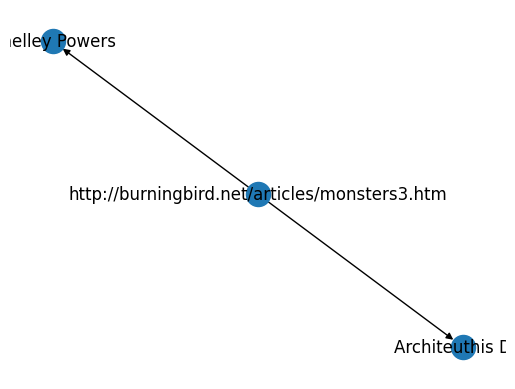

In [19]:
g = RDFGraph()
result = g.parse( data=rdf, format ="n3")

G = rdflib_to_networkx_multidigraph(g)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for
plt.show()

Con el grafo generado es posible obtener cualquiera de los otros formatos RDF  con la función `serialize`.

In [20]:
target_pretty = g.serialize(format="pretty-xml")
print(target_pretty)

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:ns1="http://burningbird.net/postcon/elements/1.0/"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://burningbird.net/articles/monsters3.htm">
    <ns1:author>Shelley Powers</ns1:author>
    <ns1:title>Architeuthis Dux</ns1:title>
  </rdf:Description>
</rdf:RDF>



Con *RDF Schema* se pueden especificar clases y jerarquías.

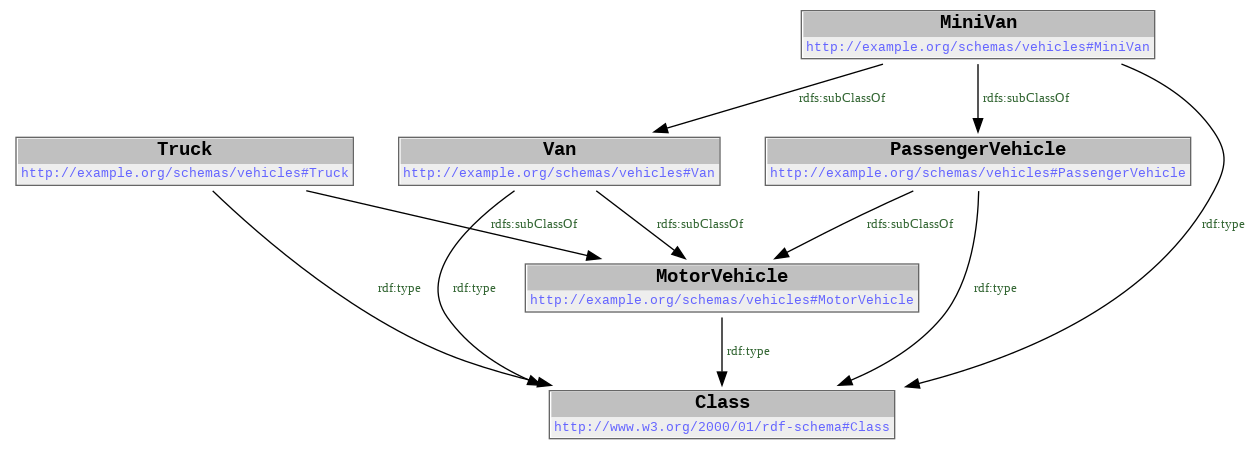

In [21]:
vehicles_data = """\
@prefix ex: <http://example.org/schemas/vehicles#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
ex:MotorVehicle       rdf:type          rdfs:Class .
ex:PassengerVehicle   rdf:type          rdfs:Class .
ex:Van                rdf:type          rdfs:Class .
ex:Truck              rdf:type          rdfs:Class .
ex:MiniVan            rdf:type          rdfs:Class .

ex:PassengerVehicle   rdfs:subClassOf   ex:MotorVehicle .
ex:Van                rdfs:subClassOf   ex:MotorVehicle .
ex:Truck              rdfs:subClassOf   ex:MotorVehicle .

ex:MiniVan            rdfs:subClassOf   ex:Van .
ex:MiniVan            rdfs:subClassOf   ex:PassengerVehicle .
"""

veh_g = RDFGraph()
veh_g.parse (data=vehicles_data, format="n3")


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize( veh_g )

Como `rdfs:SubClass` es transitiva y reflexiva, es posible deducir hechos que no están directamente explicitados en las tripletas originales. Si hacemos una consulta para seleccionar los vehículos de motor con SPARQL:

In [22]:
result = veh_g.query("""SELECT DISTINCT ?s
                    WHERE
                    {
                      ?s ?p ?o .
                      ?s rdfs:subClassOf+ ex:MotorVehicle .
                    }""", initNs={'rdf' : RDF, 'ex' : 'http://example.org/schemas/vehicles#'})

for row in result:
  print (row)

(rdflib.term.URIRef('http://example.org/schemas/vehicles#PassengerVehicle'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#MiniVan'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Van'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Truck'),)


Advertir que tanto `MiniVan` se muestra como `MotorVehicle` aunque no hay una tripleta que lo indique directamente (transitivamente a través de `PassengerVehicle`).

Ahora es tu turno. Vamos a trabajar con las siguientes tripletas sobre Nintendo. Completa los elementos que faltan donde se especifica con #TODO para obtener un grafo consistente.

In [23]:
prefixes = """\
@prefix ex: <http://example.org/demo/#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix dbp: <http://dbpedia.org/resource/> .
@prefix dbpp: <http://dbpedia.org/property/> .
@prefix dbo: <http://dbpedia.org/ontology/> .

"""

data = """\

dbp:Nintendo rdf:____ dbo:Company .  # TODO rdf:____
dbp:Nintendo rdfs:____ "Nintendo"@es .  # TODO rdfs:_____

dbp:Nintendo_Switch rdf:type dbo:_______ .  #TODO  dbo:_______
dbp:Nintendo_Switch dbo:manufacturer dbp:________ .  #TODO dbp:_____
dbp:Nintendo_Switch rdfs:label "Nintendo Switch"@es .

dbp:Super_Mario_Odyssey rdf:type dbo:________ .  #TODO: dbo:________
dbp:Super_Mario_Odyssey dbo:_______ dbp:Nintendo_Switch .  #TODO   dbo:_______
dbp:Super_Mario_Odyssey rdfs:label "Super Mario Odyssey"@es .

dbp:Shigeru_Miyamoto rdf:type dbo:_______ .  #TODO dbo:_____
dbp:Shigeru_Miyamoto dbo:employer dbp:______ .  #TODO dbp:______
dbp:Shigeru_Miyamoto rdfs:label "Shigeru Miyamoto"@es .
dbp:Shigeru_Miyamoto dbo:notableWork dbp:Super_Mario_Odyssey .
"""

gx = RDFGraph()

# TODO

In [24]:
import rdflib

# Creamos un grafo RDF
gx = RDFGraph()

# Definimos los prefijos y las tripletas RDF con los TODOs completados
prefixes = """
@prefix ex: <http://example.org/demo/#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix dbp: <http://dbpedia.org/resource/> .
@prefix dbpp: <http://dbpedia.org/property/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
"""

data = """
dbp:Nintendo rdf:type dbo:Company .
dbp:Nintendo rdfs:label "Nintendo"@es .

dbp:Nintendo_Switch rdf:type dbo:Product .
dbp:Nintendo_Switch dbo:manufacturer dbp:Nintendo .
dbp:Nintendo_Switch rdfs:label "Nintendo Switch"@es .

dbp:Super_Mario_Odyssey rdf:type dbo:VideoGame .
dbp:Super_Mario_Odyssey dbo:platform dbp:Nintendo_Switch .
dbp:Super_Mario_Odyssey rdfs:label "Super Mario Odyssey"@es .

dbp:Shigeru_Miyamoto rdf:type dbo:Person .
dbp:Shigeru_Miyamoto dbo:employer dbp:Nintendo .
dbp:Shigeru_Miyamoto rdfs:label "Shigeru Miyamoto"@es .
dbp:Shigeru_Miyamoto dbo:notableWork dbp:Super_Mario_Odyssey .
"""

# Parseamos los prefijos y datos al grafo RDF
gx.parse(data=prefixes + data, format='turtle')

# Imprimimos todas las tripletas en el grafo
for s, p, o in gx:
    print(s, p, o)

http://dbpedia.org/resource/Super_Mario_Odyssey http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dbpedia.org/ontology/VideoGame
http://dbpedia.org/resource/Nintendo_Switch http://www.w3.org/2000/01/rdf-schema#label Nintendo Switch
http://dbpedia.org/resource/Super_Mario_Odyssey http://www.w3.org/2000/01/rdf-schema#label Super Mario Odyssey
http://dbpedia.org/resource/Nintendo_Switch http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dbpedia.org/ontology/Product
http://dbpedia.org/resource/Nintendo_Switch http://dbpedia.org/ontology/manufacturer http://dbpedia.org/resource/Nintendo
http://dbpedia.org/resource/Nintendo http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dbpedia.org/ontology/Company
http://dbpedia.org/resource/Nintendo http://www.w3.org/2000/01/rdf-schema#label Nintendo
http://dbpedia.org/resource/Shigeru_Miyamoto http://dbpedia.org/ontology/employer http://dbpedia.org/resource/Nintendo
http://dbpedia.org/resource/Shigeru_Miyamoto http://www.w3.org/2000/01/rd

In [25]:
print(f'El número de tripletas es: {len(gx)}')

for triplet in gx:
    print(triplet)


El número de tripletas es: 12
(rdflib.term.URIRef('http://dbpedia.org/resource/Super_Mario_Odyssey'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/VideoGame'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo_Switch'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Nintendo Switch', lang='es'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Super_Mario_Odyssey'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Super Mario Odyssey', lang='es'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo_Switch'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/Product'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo_Switch'), rdflib.term.URIRef('http://dbpedia.org/ontology/manufacturer'), rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo')

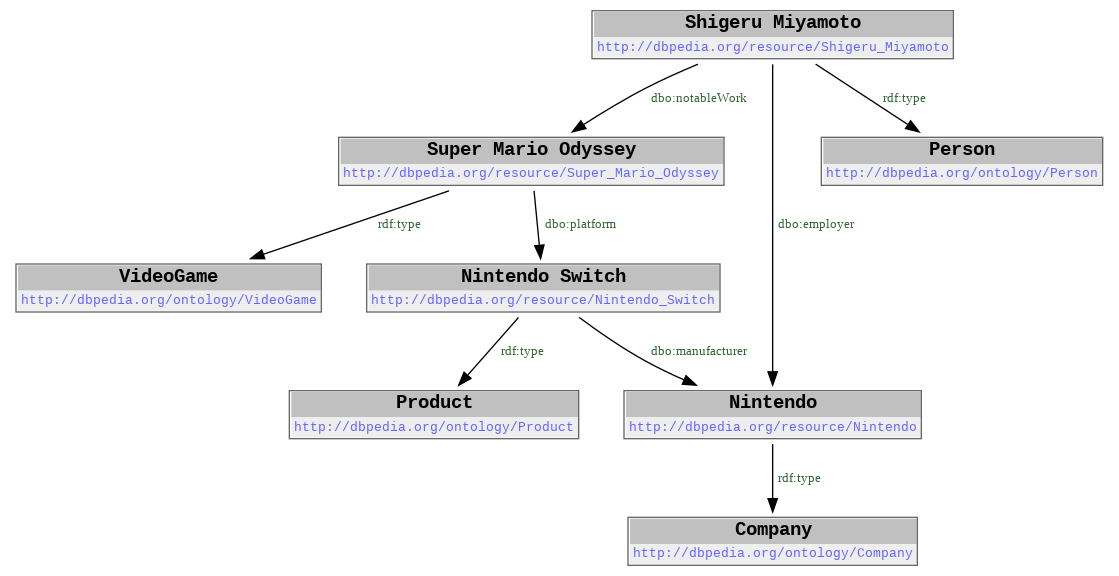

In [26]:
visualize(gx)

Serializar el grafo obtenido como Turtle:

In [27]:
# Serializar el grafo en formato Turtle
turtle_data = gx.serialize(format='turtle')

# Imprimir los datos serializados
print(turtle_data)

@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbp: <http://dbpedia.org/resource/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

dbp:Shigeru_Miyamoto a dbo:Person ;
    rdfs:label "Shigeru Miyamoto"@es ;
    dbo:employer dbp:Nintendo ;
    dbo:notableWork dbp:Super_Mario_Odyssey .

dbp:Nintendo_Switch a dbo:Product ;
    rdfs:label "Nintendo Switch"@es ;
    dbo:manufacturer dbp:Nintendo .

dbp:Super_Mario_Odyssey a dbo:VideoGame ;
    rdfs:label "Super Mario Odyssey"@es ;
    dbo:platform dbp:Nintendo_Switch .

dbp:Nintendo a dbo:Company ;
    rdfs:label "Nintendo"@es .




Veamos otro ejemplo de grafo sobre libros de ciencia ficción:

In [28]:
prefix_fiction = '''
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

'''


data_fiction = '''
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

dbr:Dune dbo:author dbr:Frank_Herbert .
dbr:Dune rdf:type dbo:Book .
dbr:Dune dbo:genre dbr:Science_fiction .

dbr:Foundation dbo:author dbr:Isaac_Asimov .
dbr:Foundation rdf:type dbo:Book .
dbr:Foundation dbo:genre dbr:Science_fiction .

dbr:The_Da_Vinci_Code dbo:author dbr:Dan_Brown .
dbr:The_Da_Vinci_Code rdf:type dbo:Book .
dbr:The_Da_Vinci_Code dbo:genre dbr:Mystery .

dbr:Gone_Girl dbo:author dbr:Gillian_Flynn .
dbr:Gone_Girl rdf:type dbo:Book .
dbr:Gone_Girl dbo:genre dbr:Mystery .

dbr:The_Girl_with_the_Dragon_Tattoo dbo:author dbr:Stieg_Larsson .
dbr:The_Girl_with_the_Dragon_Tattoo rdf:type dbo:Book .
dbr:The_Girl_with_the_Dragon_Tattoo dbo:genre dbr:Mystery .

dbr:In_the_Woods dbo:author dbr:Tana_French .
dbr:In_the_Woods rdf:type dbo:Book .
dbr:In_the_Woods dbo:genre dbr:Mystery .

'''

Construir un Grafo (To Do)

In [29]:
g2 = RDFGraph()
g2.parse (data=prefix_fiction + data_fiction, format='turtle')


def visualize(g2):
    stream = io.StringIO()
    rdf2dot(g2, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))


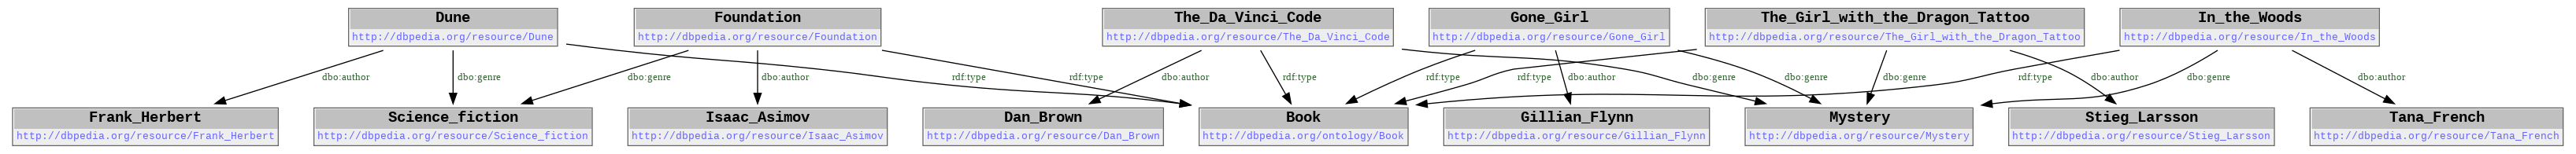

In [30]:
visualize(g2)

Añade uno de tus libros favoritos al grafo:  

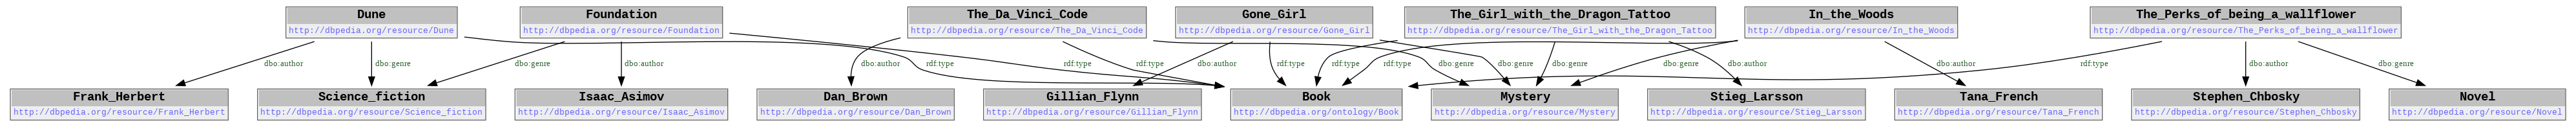

In [31]:
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
dbr = Namespace ('http://dbpedia.org/resource/')
dbo = Namespace ('http://dbpedia.org/ontology/')


# TODO
# Añadir nuevo libro y sus detalles al grafo
g2.add((dbr['The_Perks_of_being_a_wallflower'], dbo.author, dbr.Stephen_Chbosky))
g2.add((dbr['The_Perks_of_being_a_wallflower'], RDF.type, dbo.Book))
g2.add((dbr['The_Perks_of_being_a_wallflower'], dbo.genre, dbr.Novel))

visualize(g2)

Obtener de este grafo las novelas que son de misterio

In [32]:
query_mystery_books = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>

SELECT ?book ?author
WHERE {
  ?book dbo:genre dbr:Mystery ;
        dbo:author ?author .
}
"""

# Ejecutamos la consulta
for row in g2.query(query_mystery_books):
    print(f"Libro: {row.book}, Autor: {row.author}")


Libro: http://dbpedia.org/resource/The_Da_Vinci_Code, Autor: http://dbpedia.org/resource/Dan_Brown
Libro: http://dbpedia.org/resource/Gone_Girl, Autor: http://dbpedia.org/resource/Gillian_Flynn
Libro: http://dbpedia.org/resource/The_Girl_with_the_Dragon_Tattoo, Autor: http://dbpedia.org/resource/Stieg_Larsson
Libro: http://dbpedia.org/resource/In_the_Woods, Autor: http://dbpedia.org/resource/Tana_French


Crea un grafo sobre un tema que te interese y plantea 2 queries

In [33]:
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, XSD

# Crear el grafo
g3 = Graph()

# Definir namespaces
dbo = Namespace('http://dbpedia.org/ontology/')
dbr = Namespace('http://dbpedia.org/resource/')
ex = Namespace('http://example.org/')

# Añadir recursos y propiedades al grafo
vanguard_500 = URIRef('http://example.org/vanguard_500')
g3.add((vanguard_500, RDF.type, dbo.FinancialProduct))
g3.add((vanguard_500, ex.indexType, Literal("S&P 500", datatype=XSD.string)))
g3.add((vanguard_500, ex.investmentAmount, Literal(250000, datatype=XSD.decimal)))

msci_world = URIRef('http://example.org/msci_world')
g3.add((msci_world, RDF.type, dbo.FinancialProduct))
g3.add((msci_world, ex.indexType, Literal("MSCI World", datatype=XSD.string)))
g3.add((msci_world, ex.investmentAmount, Literal(100000, datatype=XSD.decimal)))

# Imprimir el grafo serializado para verificar
print(g3.serialize(format="turtle"))


@prefix ns1: <http://example.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:msci_world a <http://dbpedia.org/ontology/FinancialProduct> ;
    ns1:indexType "MSCI World"^^xsd:string ;
    ns1:investmentAmount 100000.0 .

ns1:vanguard_500 a <http://dbpedia.org/ontology/FinancialProduct> ;
    ns1:indexType "S&P 500"^^xsd:string ;
    ns1:investmentAmount 250000.0 .




In [34]:
#Consulta 1: Obtener todos los fondos indexados y sus respectivos montos de inversión

query1 = """
PREFIX ex: <http://example.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT ?fund ?indexType ?amount
WHERE {
  ?fund a dbo:FinancialProduct ;
        ex:indexType ?indexType ;
        ex:investmentAmount ?amount .
}
"""

# Ejecutamos la consulta
for row in g3.query(query1):
    print(f"Fondo: {row.fund}, Índice: {row.indexType}, Monto de Inversión: {row.amount}")


Fondo: http://example.org/vanguard_500, Índice: S&P 500, Monto de Inversión: 250000
Fondo: http://example.org/msci_world, Índice: MSCI World, Monto de Inversión: 100000


In [35]:
#Consulta 2: Encontrar el fondo indexado con el monto más alto de inversión

query2 = """
PREFIX ex: <http://example.org/>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT ?fund ?amount
WHERE {
  ?fund a dbo:FinancialProduct ;
        ex:investmentAmount ?amount .
}
ORDER BY DESC(?amount)
LIMIT 1
"""

# Ejecutamos
for row in g3.query(query2):
    print(f"Fondo con mayor inversión inicial: {row.fund}, Monto: {row.amount}")


Fondo con mayor inversión inicial: http://example.org/vanguard_500, Monto: 250000


# Ejercicio 6: SPARQL (1,5 ptos)

Dado el siguiente grafo:

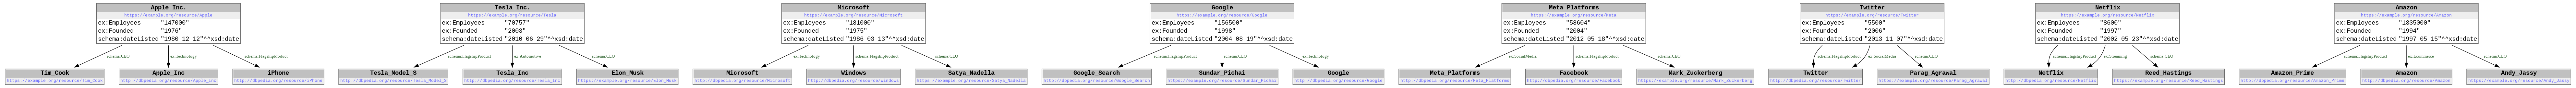

In [36]:
cars = '''@prefix ex: <https://example.org/resource/> .
@prefix schema: <https://schema.org/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:Netflix ex:Streaming dbr:Netflix ;
    schema:CEO ex:Reed_Hastings ;
    ex:Employees "8600";
    ex:Founded "1997";
    schema:dateListed "2002-05-23"^^xsd:date ;
    schema:FlagshipProduct dbr:Netflix;
    rdfs:label "Netflix"@en .

ex:Meta ex:SocialMedia dbr:Meta_Platforms ;
    schema:CEO ex:Mark_Zuckerberg ;
    ex:Employees "58604";
    ex:Founded "2004";
    schema:dateListed "2012-05-18"^^xsd:date ;
    schema:FlagshipProduct dbr:Facebook;
    rdfs:label "Meta Platforms"@en .

ex:Apple ex:Technology dbr:Apple_Inc ;
    schema:CEO ex:Tim_Cook ;
    ex:Employees "147000";
    ex:Founded "1976";
    schema:dateListed "1980-12-12"^^xsd:date ;
    schema:FlagshipProduct dbr:iPhone;
    rdfs:label "Apple Inc."@en .

ex:Microsoft ex:Technology dbr:Microsoft ;
    schema:CEO ex:Satya_Nadella ;
    ex:Employees "181000";
    ex:Founded "1975";
    schema:dateListed "1986-03-13"^^xsd:date ;
    schema:FlagshipProduct dbr:Windows;
    rdfs:label "Microsoft"@en .

ex:Amazon ex:Ecommerce dbr:Amazon ;
    schema:CEO ex:Andy_Jassy ;
    ex:Employees "1335000";
    ex:Founded "1994";
    schema:dateListed "1997-05-15"^^xsd:date ;
    schema:FlagshipProduct dbr:Amazon_Prime;
    rdfs:label "Amazon"@en .

ex:Google ex:Technology dbr:Google ;
    schema:CEO ex:Sundar_Pichai ;
    ex:Employees "156500";
    ex:Founded "1998";
    schema:dateListed "2004-08-19"^^xsd:date ;
    schema:FlagshipProduct dbr:Google_Search;
    rdfs:label "Google"@en .

ex:Tesla ex:Automotive dbr:Tesla_Inc ;
    schema:CEO ex:Elon_Musk ;
    ex:Employees "70757";
    ex:Founded "2003";
    schema:dateListed "2010-06-29"^^xsd:date ;
    schema:FlagshipProduct dbr:Tesla_Model_S;
    rdfs:label "Tesla Inc."@en .

ex:Twitter ex:SocialMedia dbr:Twitter ;
    schema:CEO ex:Parag_Agrawal ;
    ex:Employees "5500";
    ex:Founded "2006";
    schema:dateListed "2013-11-07"^^xsd:date ;
    schema:FlagshipProduct dbr:Twitter;
    rdfs:label "Twitter"@en .

'''


g_q1 = RDFGraph()
g_q1.parse (data=cars, format="turtle")

visualize (g_q1)

A continuación se pide resolver las consultas indicadas.



*   Seleccionar todas las empresas que son de SocialMedia.





In [41]:
from rdflib import Namespace

SCHEMA = Namespace('https://schema.org/')
DBR    = Namespace('http://dbpedia.org/resource/')
EX     = Namespace('https://example.org/resource/')

# Definir la consulta SPARQL
social_media = """
PREFIX ex: <https://example.org/resource/>
PREFIX schema: <https://schema.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?s
WHERE {
    ?s ex:SocialMedia ?socialMedia ;
}
"""

# Ejecutamos e imprimimos
results = g_q1.query(social_media)

for row in result:
  print (row)

(rdflib.term.URIRef('http://example.org/schemas/vehicles#PassengerVehicle'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#MiniVan'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Van'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Truck'),)


*   Seleccionar todas las empresas que fueron fundadas después de 2002 y tienen más de 40000 empleados.



In [42]:
after_2002 = """
PREFIX ex: <https://example.org/resource/>
PREFIX schema: <https://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?company ?label ?employees ?founded
WHERE {
    ?company ex:Employees ?employees ;
             ex:Founded ?founded ;
             rdfs:label ?label .

    FILTER (xsd:integer(?employees) > 40000)
    FILTER (xsd:integer(?founded) > 2002)
    FILTER (xsd:integer(?founded) > 2002)
}
"""

# Ejecutamos e imprimimos
results = g_q1.query(after_2002)

for row in results:
    print(f"Empresa: {row.label}, Empleados: {row.employees}, Fundada: {row.founded}")



Empresa: Meta Platforms, Empleados: 58604, Fundada: 2004
Empresa: Tesla Inc., Empleados: 70757, Fundada: 2003


*   Seleccionar aquellas empresas cuyo CEO tienen un nombre que comienza por S


In [39]:
# Definimos la consulta SPARQL
ceo_s = """
PREFIX schema: <https://schema.org/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ex: <https://example.org/resource/>

SELECT ?company ?label
WHERE {
    ?company schema:CEO ?ceo ;
             rdfs:label ?label .
    FILTER(STRSTARTS(STR(?ceo), STR(ex:S)))
}
"""

# Ejecutamos e imprimimos
results = g_q1.query(ceo_s)

for row in results:
  print (row)


(rdflib.term.URIRef('https://example.org/resource/Microsoft'), rdflib.term.Literal('Microsoft', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Google'), rdflib.term.Literal('Google', lang='en'))
